In [2]:
import networkx as nx
import numpy as np
import random
import itertools
import collections

seed = 1005
np.random.seed(seed)
random.seed(seed)

In [10]:
from networkx.algorithms.community.kernighan_lin import kernighan_lin_bisection

In [43]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

reds = cm.get_cmap('Reds')
sns.set(rc={'figure.figsize':(11.7,8.27)})

## Exercise five

### The classroom

We first generate a random classroom of $n$ individuals based on the Barabási–Albert model.

In [62]:
class SocialNetwork:
    def __init__(self, G):
        
        self.G =  G
        self.layout = nx.spring_layout(self.G)
        
    @property
    def eigen(self):
        return list(nx.eigenvector_centrality(self.G).values())
    
    @property
    def utility(self):
        return sum(degree for node, degree in self.G.degree)
    
    @property
    def partition(self):
        return kernighan_lin_bisection(self.G)
    
        
    def draw(self, ax, eigen_color=True, **kwargs):
        
        color_args = {
            "vmin": min(c.eigen) / 3,
            "vmax": max(c.eigen),
            "node_color": self.eigen,
            "cmap": reds
        } if eigen_color else { "cmap": "red" }

            
        nx.draw(
            self.G, self.layout,
            ax = ax,
            **color_args,
            **kwargs)
        
        return ax
    
    def draw_subgraphs(self, A, B, ax):
        
        AG = self.G.subgraph(A)
        BG = self.G.subgraph(B)
        
        nx.draw(AG, self.layout, node_color="r", ax = ax)
        nx.draw(BG, self.layout, node_color="b", ax = ax)
        
        return ax
    
    def draw_degree(self, ax):
        
        degrees = sorted([d for n, d in self.G.degree()], reverse=True)
        degree_count = collections.Counter(degrees)
        
        deg, cnt = zip(*degree_count.items())
        
        ax.bar(deg, cnt)
        ax.set_xlabel("Degrees")
        ax.set_ylabel("Count")
        
        ax.set_xticks([d + 0.4 for d in deg])
        ax.set_xticklabels(deg)
        
        return ax

In [63]:
c = SocialNetwork(
    nx.extended_barabasi_albert_graph(30, 2, 0.2, 0.5)
)

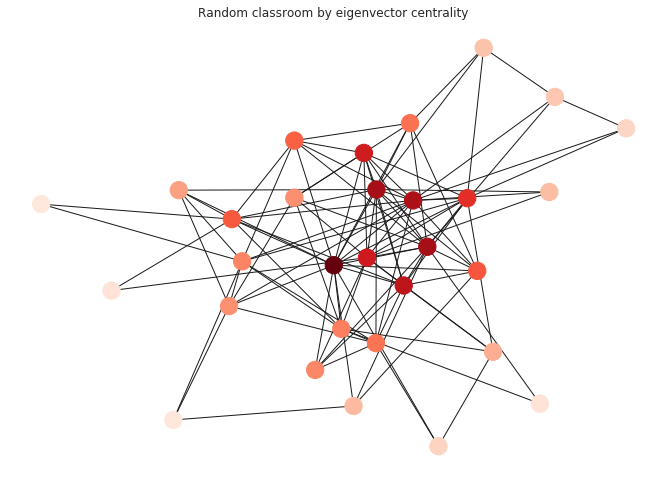

In [64]:
fig, ax = plt.subplots()
c.draw(ax)
ax.set_title("Random classroom by eigenvector centrality")
fig.show()

### Partition

We want to find the partition that minimizes the number of edges between classes. 

In [65]:
A, B = c.partition

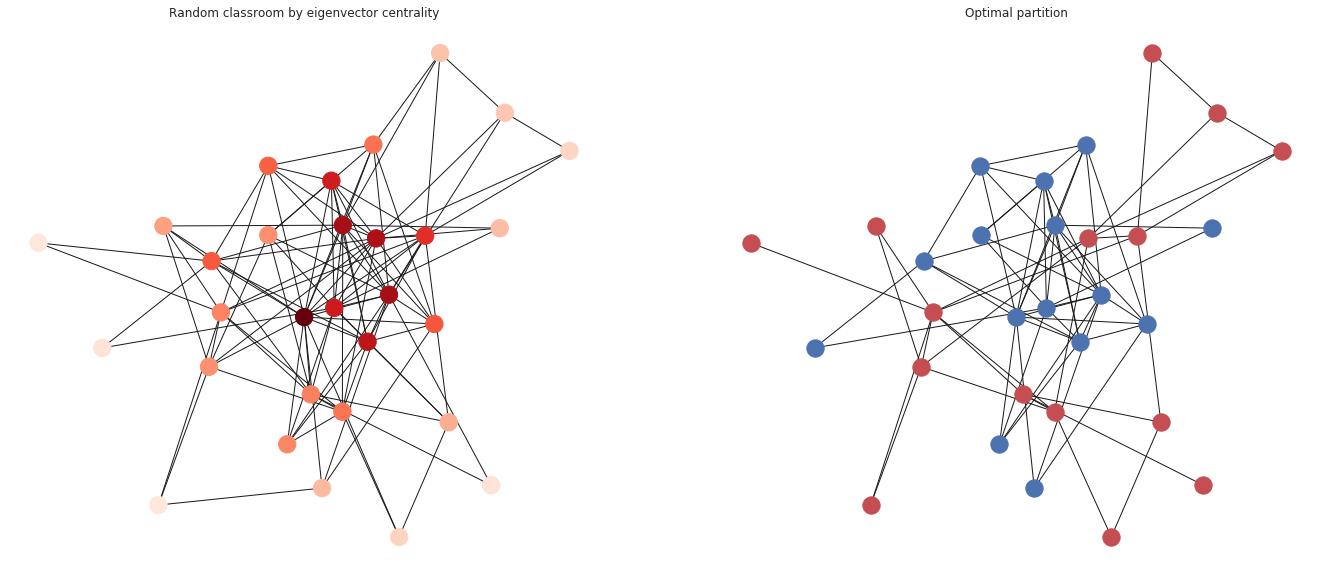

In [66]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (11.7 * 2, 10))


c.draw(ax1)
c.draw_subgraphs(A, B, ax2)

ax1.set_title("Random classroom by eigenvector centrality")
ax2.set_title("Optimal partition")
fig.savefig("plots/classroom.png")
fig.show()

### A smaller class

In [67]:
c = SocialNetwork(
    nx.extended_barabasi_albert_graph(4, 1, 0.2, 0.5)
)

A, B = c.partition

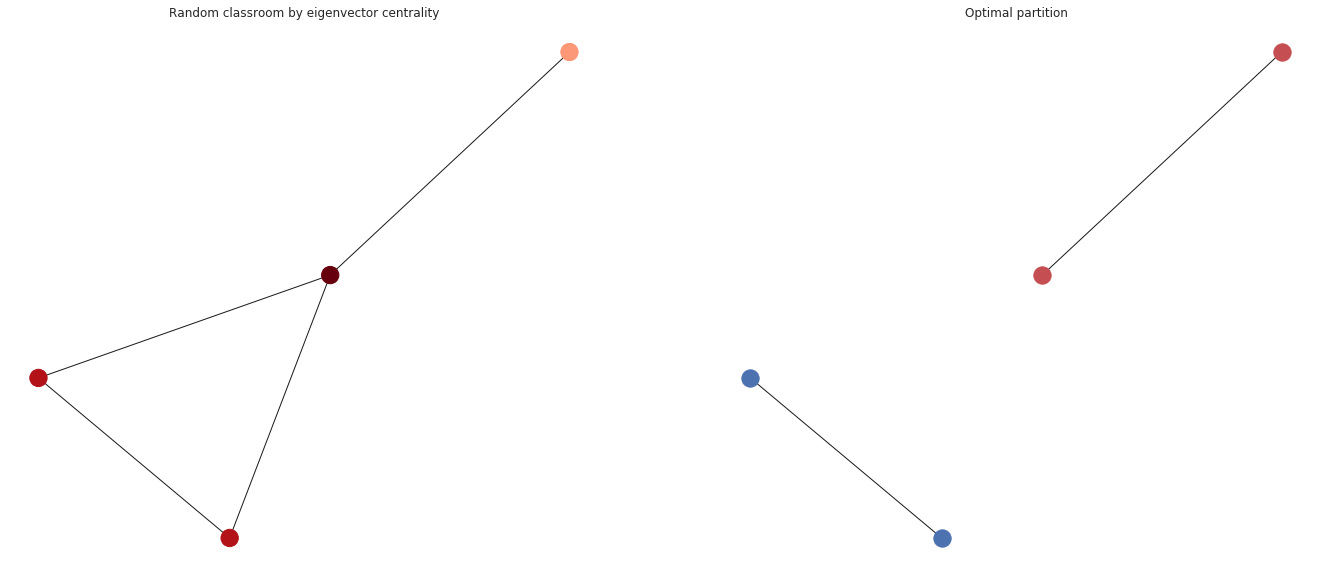

In [68]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (11.7 * 2, 10))


c.draw(ax1)
c.draw_subgraphs(A, B, ax2)

ax1.set_title("Random classroom by eigenvector centrality")
ax2.set_title("Optimal partition")

fig.show()

## Exercise six

In [183]:
office = SocialNetwork(
    nx.random_geometric_graph(100, 0.2)
)

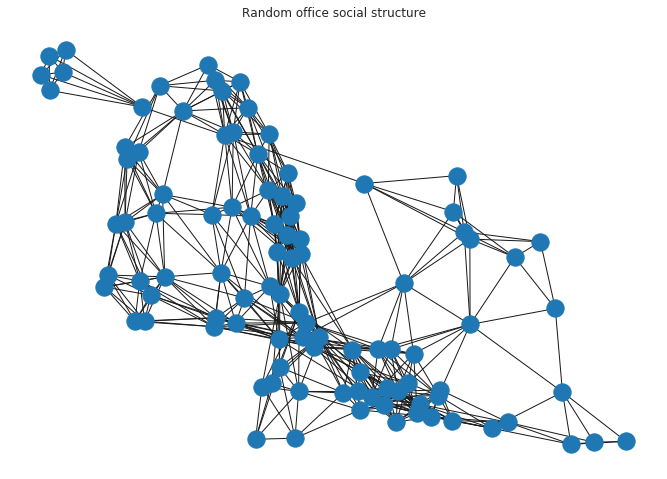

In [185]:
fig, ax = plt.subplots()
office.draw(ax, eigen_color=False)
ax.set_title("Random office social structure")
fig.show()

In [186]:
def naive_explore(G):

    initial = random.randint(0, len(G) - 1)
    
    found_nodes = set([initial])
    current = initial

    while True:

        neighbors = [node for node in G.neighbors(current) if node not in found_nodes]
        N = len(neighbors)

        if N == 0: break # No more neighbors to traverse

        jump_to = neighbors[random.randint(0, N - 1)]

        current = jump_to
        found_nodes.add(jump_to)
        
        
    return found_nodes

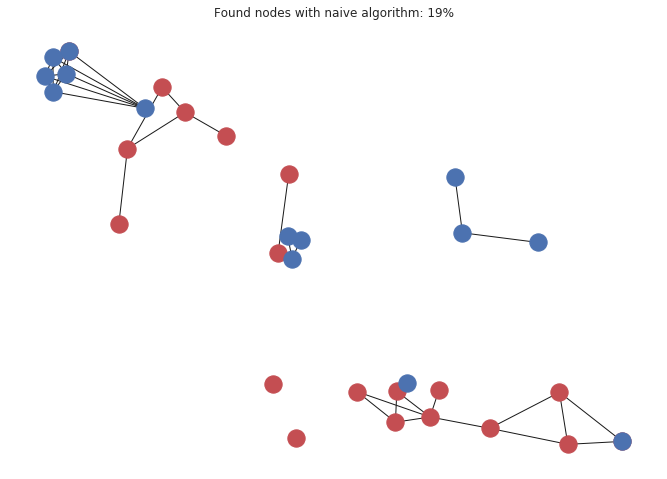

In [198]:
fig, ax = plt.subplots()

office.draw_subgraphs(found, not_found, ax)
ax.set_title(f"Found nodes with naive algorithm: {100*len(found) / len(office.G.nodes):.0f}%")

fig.show()


In [187]:
found = naive_explore(office.G)
not_found = set((node for node in office.G.nodes if node not in found))

In [194]:
pct_found = []
runs = 1_000

for i in range(runs):
    print(f"Iteraton: {i + 1}/{runs}", end="\r")
    
    random_office = SocialNetwork(nx.random_geometric_graph(25, 0.1))
    found = naive_explore(random_office.G)
    
    pct_found.append(len(found) / len(random_office.G.nodes))



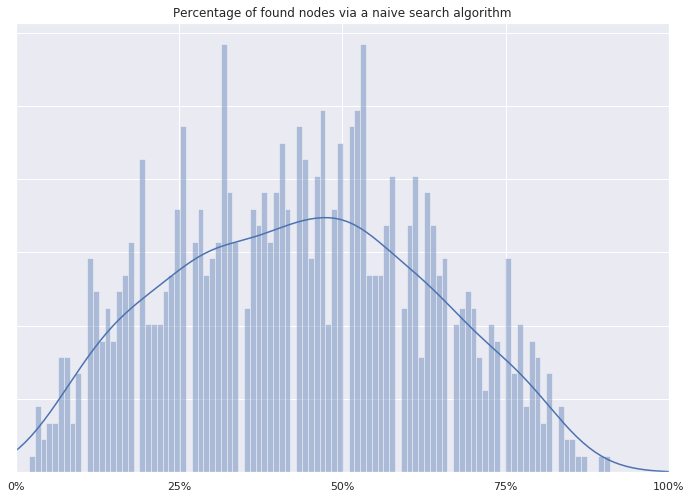

In [196]:
fig, ax = plt.subplots()

sns.distplot(pct_found, bins=100, kde=True, ax = ax)
xs = np.linspace(0., 1., 5)
xs_labels = [f"{x*100:.0f}%" for x in xs]

ax.set_title("Percentage of found nodes via a naive search algorithm")
ax.set_xlim(0, 1)
ax.set_xticks(xs)
ax.set_xticklabels(xs_labels)

ax.set_yticklabels([])

fig.show()